<a href="https://www.kaggle.com/code/tejas14/notebook0fbe55a8a4?scriptVersionId=160859757" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing the dataset

In [2]:
train_data=pd.read_csv(r"/kaggle/input/training-and-test-dataset/kaggle_train.csv")
test_data=pd.read_csv(r"/kaggle/input/training-and-test-dataset/kaggle_test.csv")

## 3. Converting categorical features into numerical features

In [3]:
geography_encoded=pd.get_dummies(train_data['Geography'],prefix='Geography')
gender_encoded=pd.get_dummies(train_data['Gender'],prefix='Gender')

In [4]:
train_data=pd.concat([train_data,geography_encoded,gender_encoded],axis=1)

In [5]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False,False,True
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False,False,True
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False,False,True
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False,False,True
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True,False,True


## 4. Dropping the un-necessary and categorical features

In [6]:
train_data.drop(['id','CustomerId','Surname','Geography','Gender'],axis=1,inplace=True)

In [7]:
train_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True,False,True


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


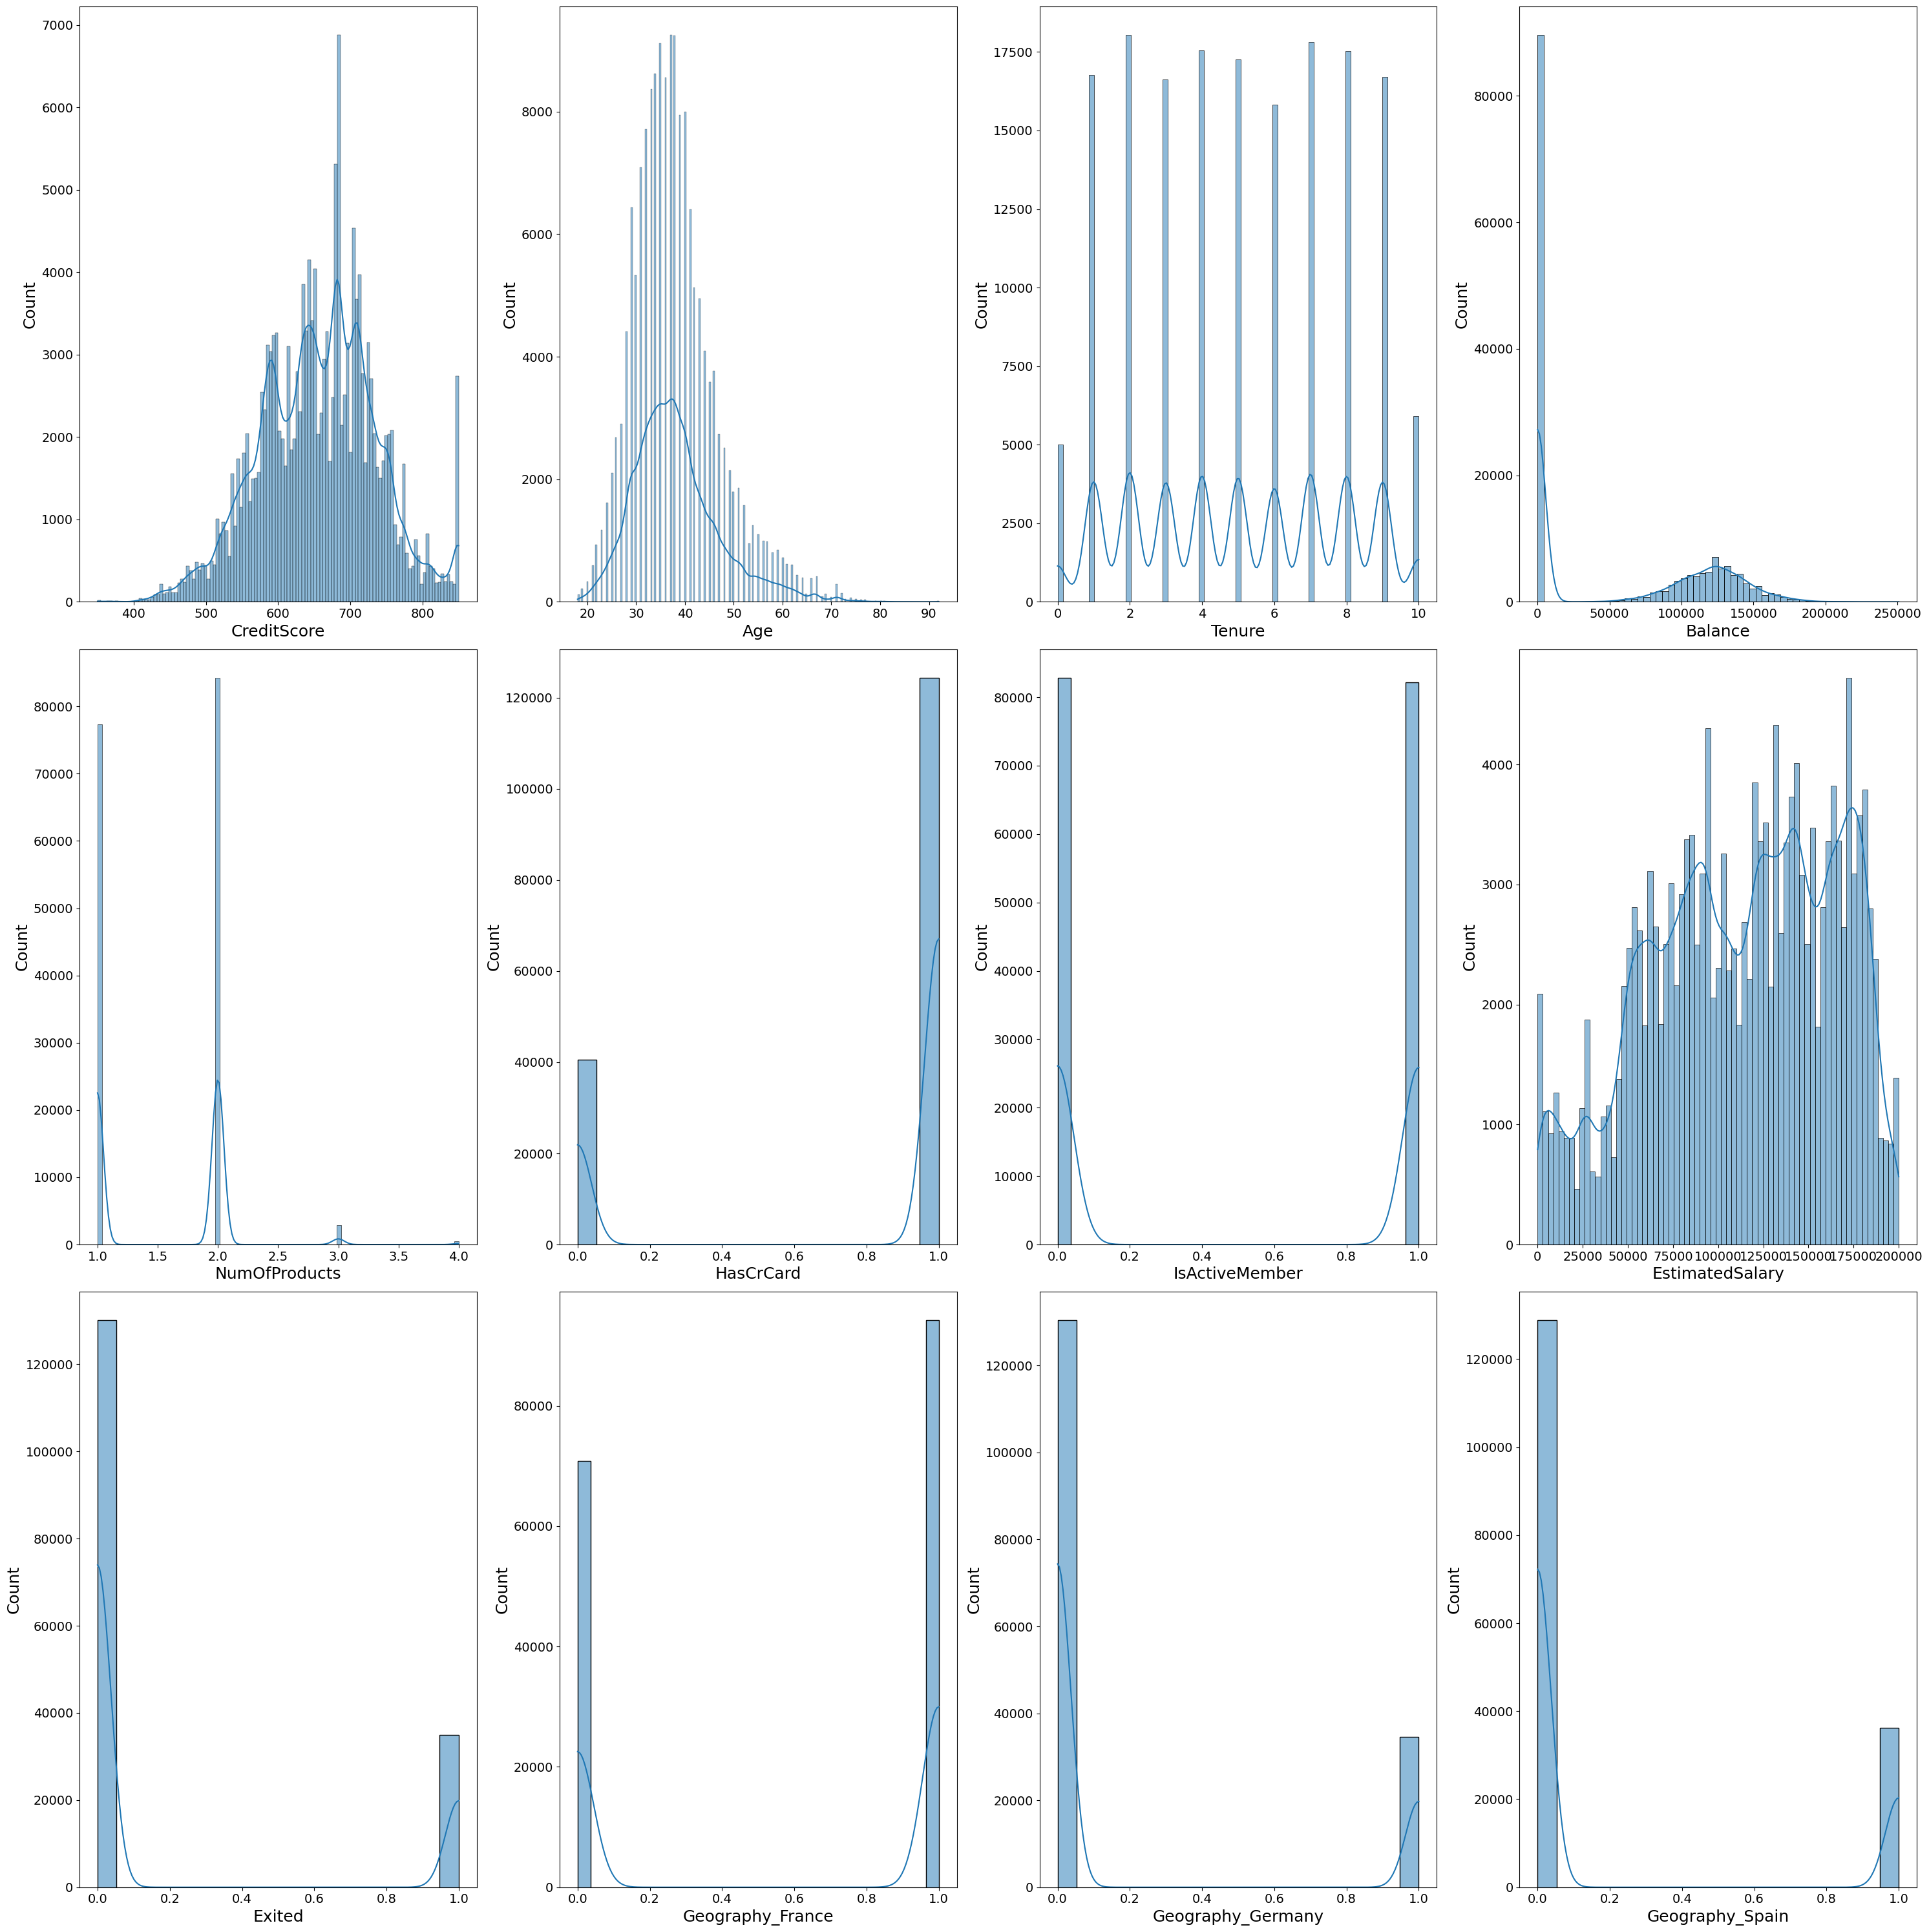

In [8]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in train_data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(train_data[column],kde=True)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Count',fontsize=18)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer,MinMaxScaler,RobustScaler

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
from sklearn.metrics import roc_auc_score

## 5. Splitting the datatset into x and y variables

In [13]:
x=train_data.drop(columns=['Exited'])
y=train_data['Exited']

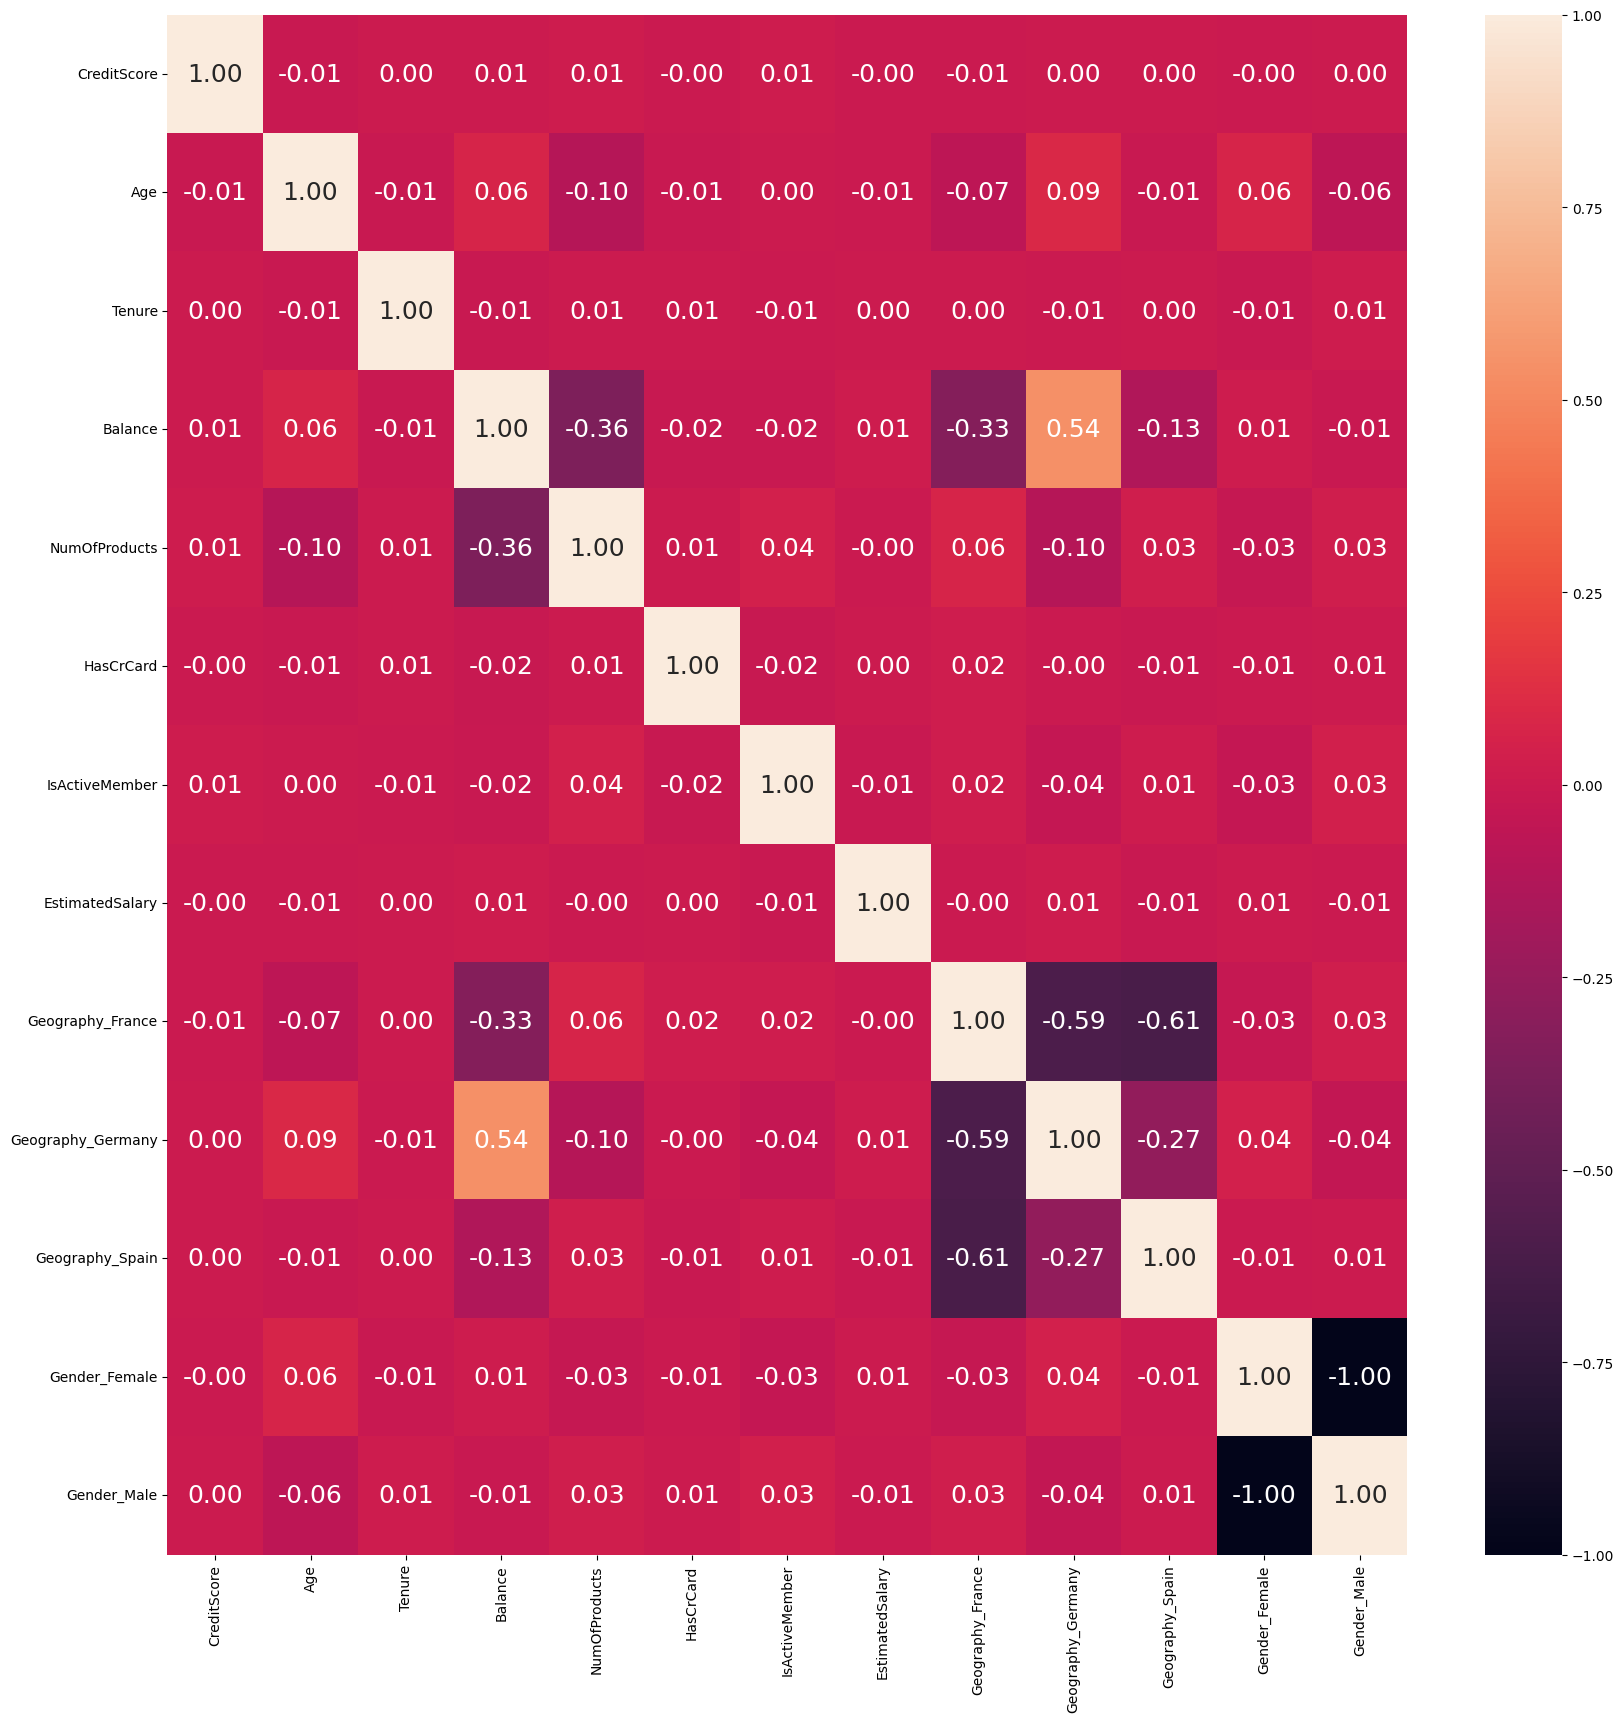

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(x.corr(),annot=True,fmt=".2f",annot_kws={"size": 18},xticklabels=x.columns, yticklabels=x.columns)
plt.show()

## 6. Splitting the data into training and test datatset

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=878)

## 7. Assigning the object to the feature scaling classes

In [16]:
scaler=StandardScaler()
mmx=MinMaxScaler()
rs=RobustScaler()
pt=PowerTransformer()
qt=QuantileTransformer()

In [17]:
train_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,True,False,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,True,False,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,True,False,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,True,False,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,False,True,False,True


## 8. Splitting the columns into different features

In [18]:
standard_scaler_featuress=train_data[['Age','Tenure','HasCrCard','IsActiveMember']]
minmax_scaler_features=train_data[['NumOfProducts']]

In [19]:
standard_scaler_transformer=Pipeline(steps=[('scaler',scaler)])
minmax_scaler_transformer=Pipeline(steps=[('minmax',mmx)])
robust_scaler_transformer=Pipeline(steps=[('robust',rs)])

In [20]:
standard_scaler_mask=x_train.columns.isin(standard_scaler_featuress)
minmax_scaler_mask=x_train.columns.isin(minmax_scaler_features)

In [21]:
robust_scaler_features_1=train_data[['Balance','EstimatedSalary','CreditScore']]
robust_scaler_mask_1=x_train.columns.isin(robust_scaler_features_1)

## 9. Defining Column transformer to apply different feature scaling

In [22]:
processor_3=ColumnTransformer(
transformers=[('scaler',standard_scaler_transformer,standard_scaler_mask),
             ('minmax',minmax_scaler_transformer,minmax_scaler_mask),
             ('robust',robust_scaler_transformer,robust_scaler_mask_1)],
remainder='passthrough')

## 10. Applying the scaled features on the training and test datatset

In [23]:
x_process_train_3=processor_3.fit_transform(x_train)
x_process_test_3=processor_3.transform(x_test)

## 11. Initiating the Logisticregression model and training the model using .fit method

In [24]:
model_3=LogisticRegression()
model_3.fit(x_process_train_3,y_train)

LogisticRegression()

## 12. Predicting the y values for the x_test values

In [25]:
y_pred_3=model_3.predict(x_process_test_3)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
conf_mat=confusion_matrix(y_test,y_pred_3)
conf_mat

array([[30949,  1486],
       [ 5413,  3411]])

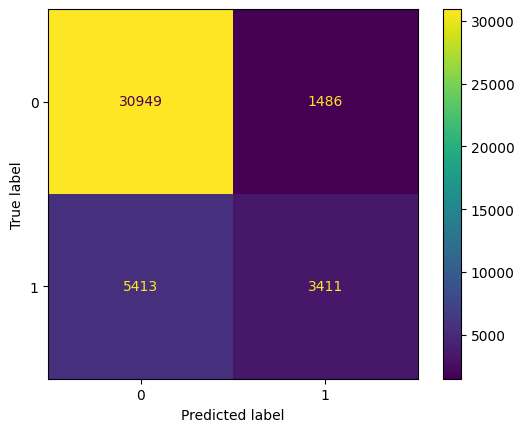

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy=accuracy_score(y_test,y_pred_3)
accuracy

0.8327879977701835

In [31]:
true_positive=conf_mat[0][0]
false_negative=conf_mat[0][1]
false_positive=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [32]:
tpr=true_positive/(true_positive+false_negative)
tpr

0.9541852936642515

In [33]:
fpr=false_positive/(false_positive+true_negative)
fpr

0.6134406165004533

In [34]:
Accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
Accuracy

0.8327879977701835

In [35]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.9541852936642515

In [36]:
Precision_1=true_positive/(true_positive+false_positive)
Precision_1

0.85113580111105

In [37]:
f1=2*((Precision_1 * Recall )) /(Precision_1 + Recall)
f1

0.899719464511534

In [38]:
y_pred_prob=model_3.predict_proba(x_process_test_3)
y_pred_prob

array([[0.93956609, 0.06043391],
       [0.92383076, 0.07616924],
       [0.98157268, 0.01842732],
       ...,
       [0.97699334, 0.02300666],
       [0.96951038, 0.03048962],
       [0.97113505, 0.02886495]])

In [39]:
y_pred_prob[:,1]

array([0.06043391, 0.07616924, 0.01842732, ..., 0.02300666, 0.03048962,
       0.02886495])

In [40]:
from sklearn.metrics import roc_curve

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [42]:
fpr

array([0.00000000e+00, 3.08308926e-05, 9.24926777e-05, ...,
       9.99969169e-01, 9.99969169e-01, 1.00000000e+00])

In [43]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99988667, 1.        ,
       1.        ])

In [44]:
thresholds

array([1.98496711, 0.98496711, 0.97896233, ..., 0.00369899, 0.00264953,
       0.00254041])

In [45]:
auc_3=roc_auc_score(y_test,y_pred_3)
auc_3

0.670372338581899

### ROC_AUC_SCORE on Training Data- 67.03 %

## 13. Plotting the ROC_AUC_CURVE

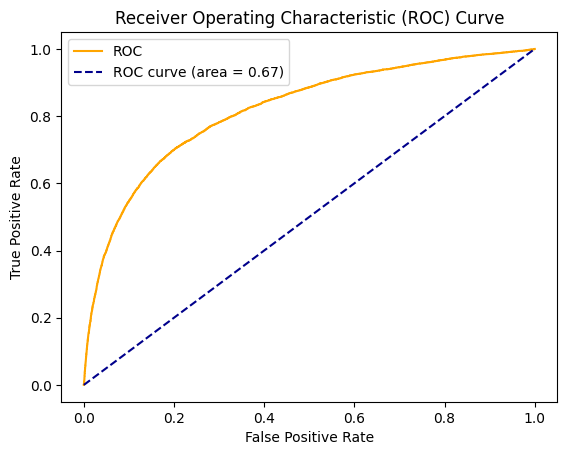

In [46]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [47]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [48]:
Geo_encoded=pd.get_dummies(test_data['Geography'],prefix='Geography')
Gender_encoded=pd.get_dummies(test_data['Gender'],prefix='Gender')

In [49]:
test_data=pd.concat([test_data,Geo_encoded,Gender_encoded],axis=1)

In [50]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,True,False,False,True,False
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,True,False,False,True,False
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,True,False,False,True,False
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,True,False,False,False,True
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,False,True,False,False,True


In [51]:
test_data.drop(['id','CustomerId','Surname','Geography','Gender'],axis=1,inplace=True)

In [52]:
test_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,True,False,False,True,False
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,True,False,False,True,False
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,True,False,False,True,False
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,True,False,False,False,True
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,False,True,False,False,True


In [53]:
processed_test_data=processor_3.transform(test_data)

## 14. Calculating the exited probalities for test data

In [54]:
test_predictions_1=model_3.predict(processed_test_data)
test_predictions_1

array([0, 1, 0, ..., 0, 0, 0])

In [55]:
test_predictions=model_3.predict_proba(processed_test_data)[:,1]
test_predictions

array([0.02322085, 0.57368139, 0.1508916 , ..., 0.05937376, 0.09542875,
       0.30952499])

In [56]:
test_data['Exited_probablities']=test_predictions

In [57]:
test_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited_probablities
0,586,23.0,2,0.00,2,0.0,1.0,160976.75,True,False,False,True,False,0.023221
1,683,46.0,2,0.00,1,1.0,0.0,72549.27,True,False,False,True,False,0.573681
2,656,34.0,7,0.00,2,1.0,0.0,138882.09,True,False,False,True,False,0.150892
3,681,36.0,8,0.00,1,1.0,0.0,113931.57,True,False,False,False,True,0.205008
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00,False,True,False,False,True,0.425278


In [58]:
test_data_2=pd.read_csv(r"/kaggle/input/training-and-test-dataset/kaggle_test.csv")

In [59]:
test_data_2.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [60]:
test_data_3=pd.concat([test_data_2['id'],test_data['Exited_probablities']],axis=1)

In [61]:
test_data_3.head()

,id,Exited_probablities
0,165034,0.023221
1,165035,0.573681
2,165036,0.150892
3,165037,0.205008
4,165038,0.425278


In [62]:
test_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   110023 non-null  int64  
 1   Exited_probablities  110023 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [63]:
test_data_3.head()

,id,Exited_probablities
0,165034,0.023221
1,165035,0.573681
2,165036,0.150892
3,165037,0.205008
4,165038,0.425278


In [64]:
test_data_3.rename(columns={'Exited_probablities':'Exited'},inplace=True)

In [65]:
test_data_3.head()

,id,Exited
0,165034,0.023221
1,165035,0.573681
2,165036,0.150892
3,165037,0.205008
4,165038,0.425278


In [66]:
submission=test_data_3.copy()

In [67]:
submission.head()

,id,Exited
0,165034,0.023221
1,165035,0.573681
2,165036,0.150892
3,165037,0.205008
4,165038,0.425278


In [68]:
submission.to_csv("submission.csv",index=True)